In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string
import tensorflow as tf


random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

   Feature1  Feature2  Target
0  2.067788  0.258133       1
1  0.993994 -0.609145       1
2 -0.690315  0.749921       0
3  1.023582  0.529003       0
4  0.700747 -0.496724       1

[5 rows x 3 columns]
(500, 2) (500, 1)


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


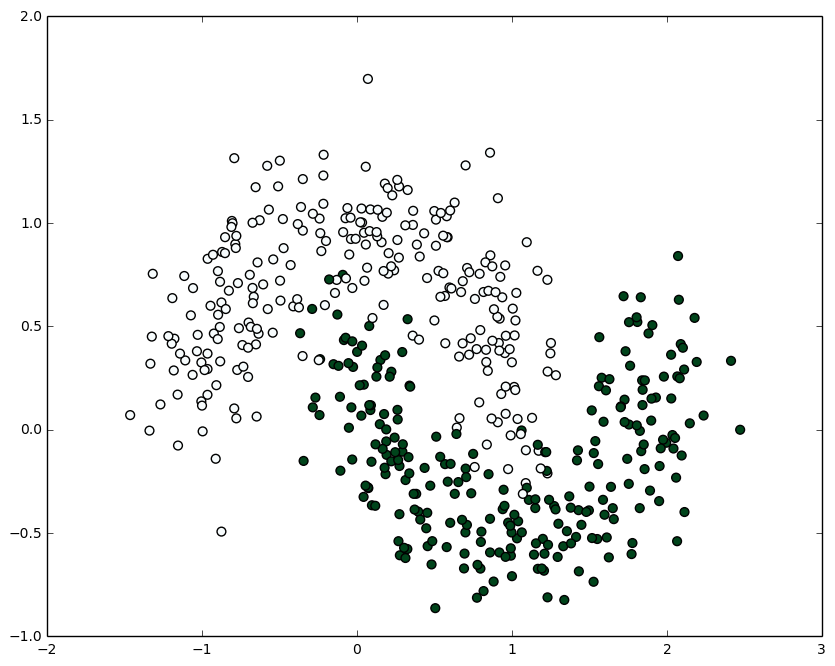

In [16]:
#read the datasets
train = pd.read_csv("../../code/data/intro_to_ann.csv")
print (train.head())
X, y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

#y_onehot = np.eye(2)[y]
y_reshaped = np.reshape(y,(500,1))
print(X.shape, y_reshaped.shape)

In [17]:
num_input  = 2
num_hidden = 4
num_output = 1

x  = tf.placeholder(tf.float32, [None, num_input])
y_ = tf.placeholder(tf.float32, [None, num_output])

W_1_2 = tf.Variable(tf.zeros([num_input, num_hidden]))
W_2_3    = tf.Variable(tf.zeros([num_hidden, num_output]))
b_hidden = tf.Variable(tf.zeros([num_hidden]))
b_out = tf.Variable(tf.zeros([num_output]))

### ERROR HERE SHOULD NOT USE SOFTMAX!!!    ###
'''hidden = tf.nn.softmax(tf.add(tf.matmul(x,W_1_2), b_hidden))
y_pred = tf.nn.softmax(tf.add(tf.matmul(hidden, W_2_3), b_out))'''
hidden = tf.add(tf.matmul(x,W_1_2), b_hidden)
y_pred = tf.add(tf.matmul(hidden, W_2_3), b_out)

In [33]:
batch_size = X.shape[0]
n_samples = X.shape[0]
learning_rate = .01

# Mean squared error
cost = tf.reduce_sum(tf.pow(y_pred-y_, 2))/(2*batch_size)
#cost = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_pred), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)  #GradientDescentOptimizer(learning_rate).minimize(cost)

In [34]:
errors = []
cross_array = []
epochs = 10000

# TensorFlow Innitialization
init = tf.initialize_all_variables()


with tf.Session() as sess:
    sess.run(init)
    batch_x = 0
    batch_y = batch_size-1
    for i in range(epochs):
      _,y_out = sess.run([train_step, y_pred],feed_dict={x: X, y_: y_reshaped})
      batch_x = (batch_x + batch_size) % (len(X))
      batch_y = (batch_y + batch_size) % (len(y))
      if i%1 == 0:
            cost_out = sess.run(cost, feed_dict={x: X, y_: y_reshaped})
            #print (cost_out)
            cross_array.append(cost_out)

[[ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000012]
 [ 0.50000

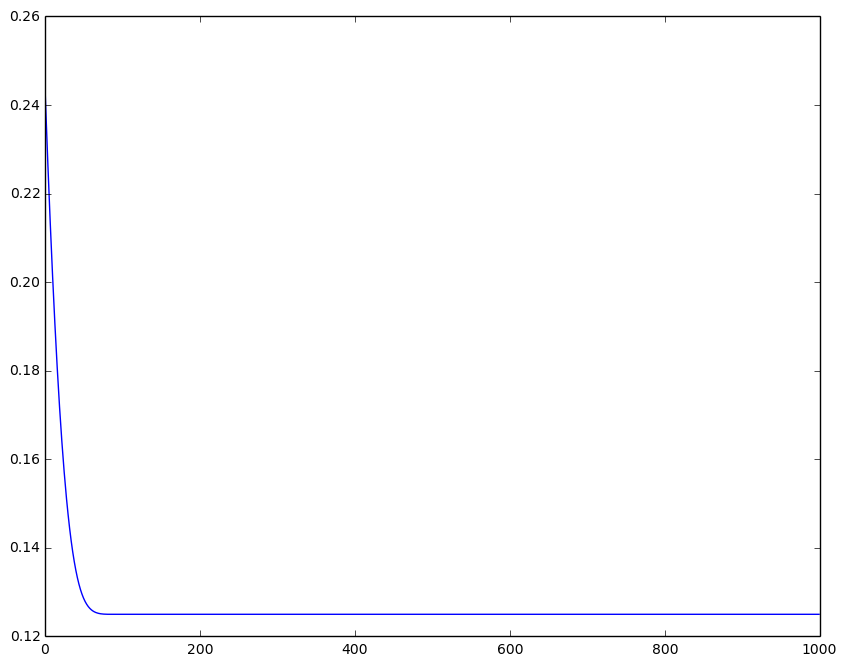

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


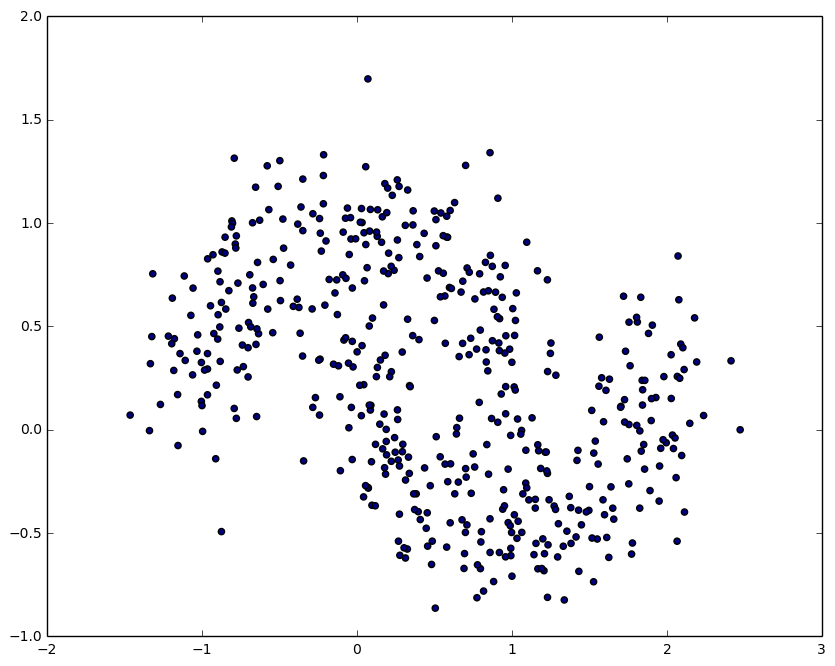

In [35]:
#print (cross_array)
plt.plot(cross_array)

print (y_out)

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=y_out)

plt.show() 